# ANCOVA #

For this assignment, I imported a recommended dataset, 'Theory of mind in remitted bipolar disorder' from the ‘Kaggle’ repository and loaded it into pandas data frame df. Then, coducted a data preprocessing to check for missing values and displayed the first few rows of the DataFrame for a quick overview also calculated the summary of statistics of numerical variables.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Database MiniPONS.csv', delimiter=';')

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

print (df.shape)

#Display the information of the DataFrame for a quick overview
print(df.info())

# Display the first few rows of the DataFrame for a quick overview
print("First few rows of the DataFrame:")
print (df.head())

# Calculate summary statistics
print(df.describe())

Missing Values:
Group               0
Type                0
Age                 0
Right_answers       0
Audio_prosody       0
Combined_channel    0
Face_video          0
Body_video          0
Positive_valence    0
Negative_valence    0
Dominant            0
Submissive          0
dtype: int64
(277, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Group             277 non-null    object
 1   Type              277 non-null    object
 2   Age               277 non-null    int64 
 3   Right_answers     277 non-null    int64 
 4   Audio_prosody     277 non-null    int64 
 5   Combined_channel  277 non-null    int64 
 6   Face_video        277 non-null    int64 
 7   Body_video        277 non-null    int64 
 8   Positive_valence  277 non-null    int64 
 9   Negative_valence  277 non-null    int64 
 10  Dominant          277 non-null    i

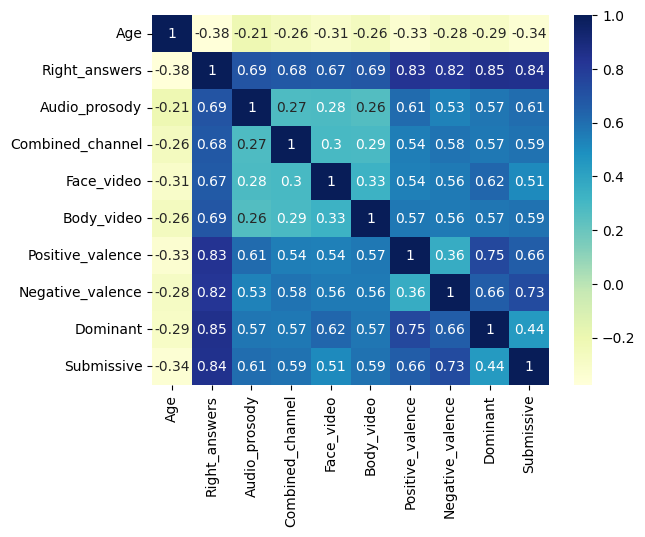

In [4]:
# Visualizing data using Heat map
# Select only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=[np.number])

# Calculate correlation matrix for numeric columns only
corr_matrix = numeric_df.corr()

# Plot heatmap of correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
plt.show()

To conduct an Analysis of Covariance (ANCOVA), we will check if the within-group trends for these continuous variables have the same slope and are parallel to the overall trend. This is crucial for validating the appropriateness of ANCOVA. Let's proceed with the analysis, starting with this examination.

<Figure size 1200x600 with 0 Axes>

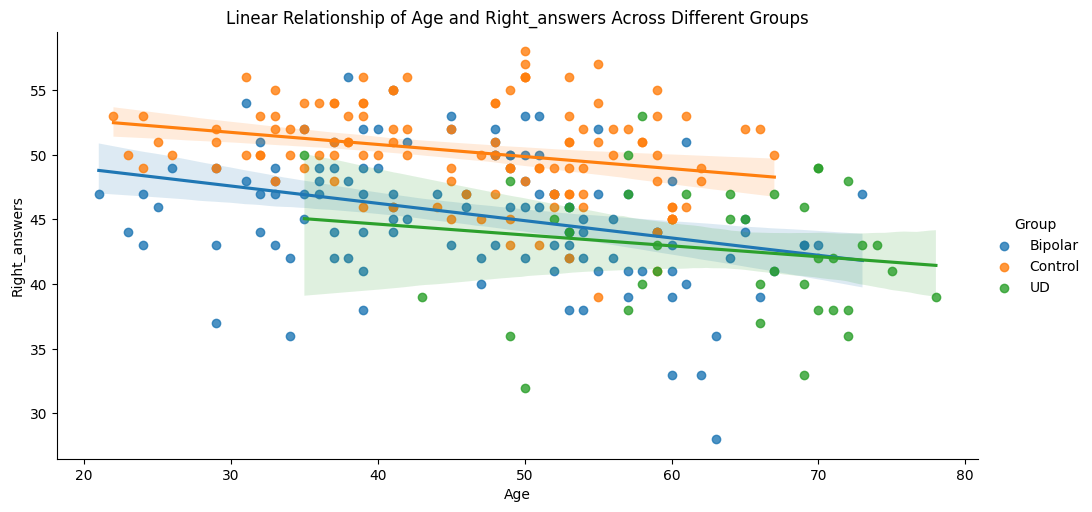

<Figure size 1200x600 with 0 Axes>

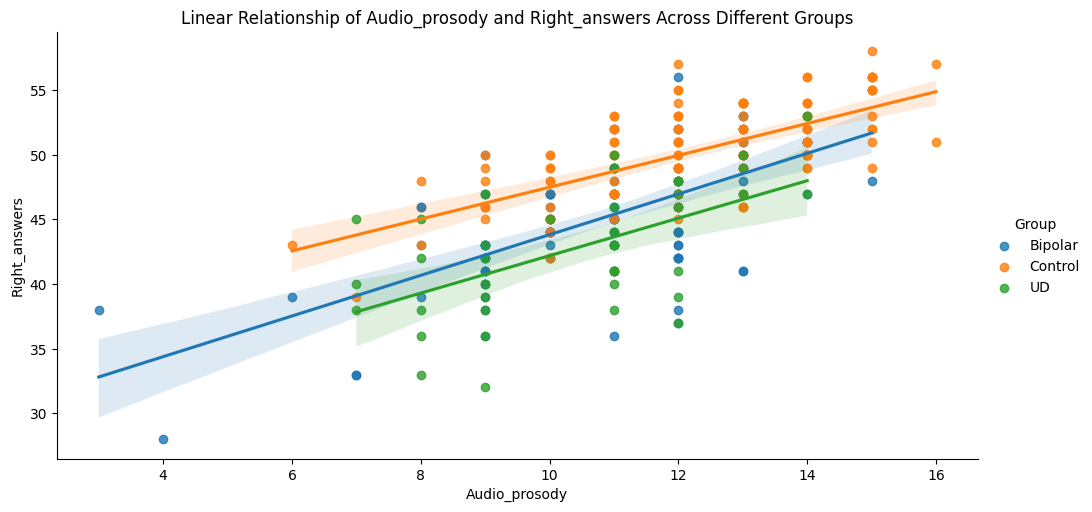

<Figure size 1200x600 with 0 Axes>

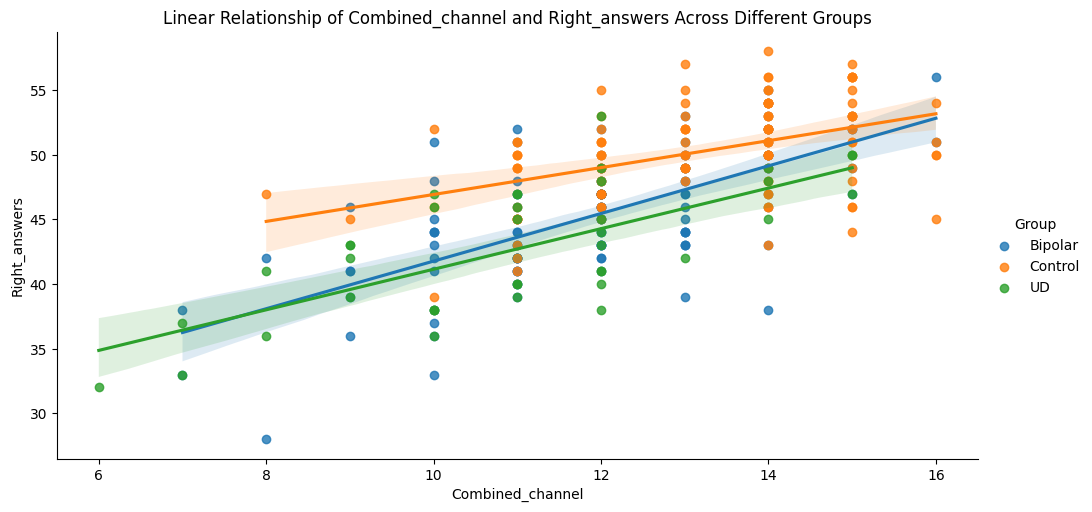

<Figure size 1200x600 with 0 Axes>

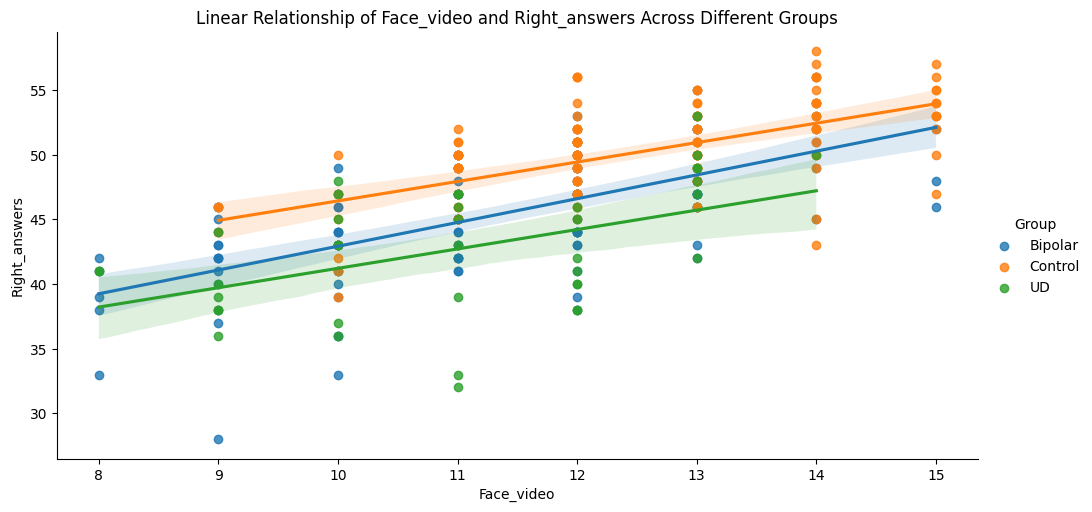

<Figure size 1200x600 with 0 Axes>

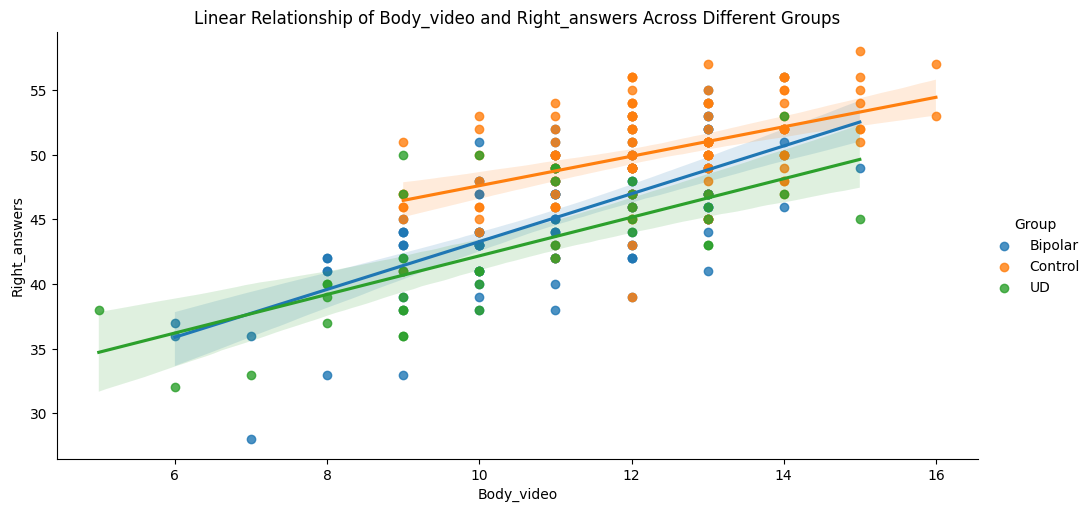

<Figure size 1200x600 with 0 Axes>

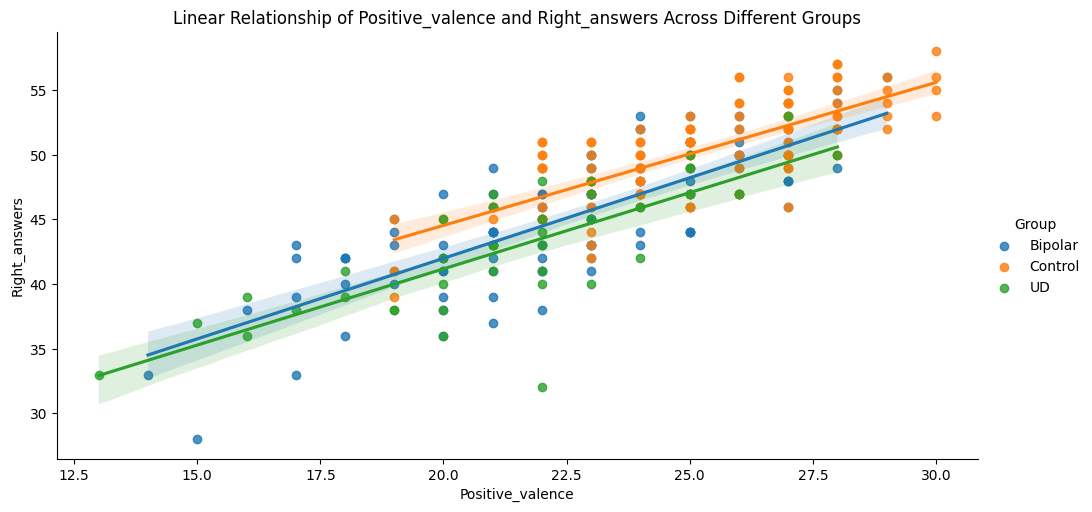

<Figure size 1200x600 with 0 Axes>

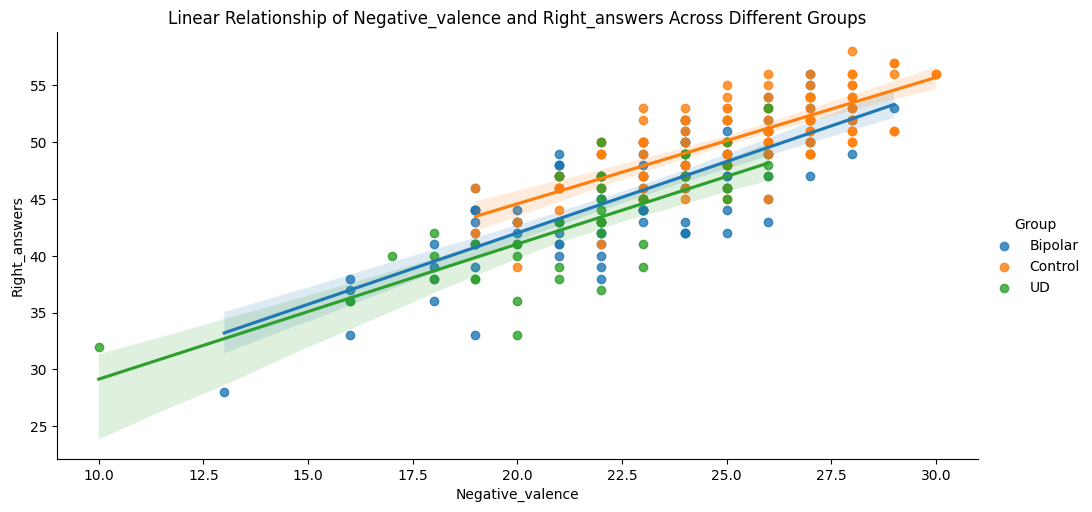

<Figure size 1200x600 with 0 Axes>

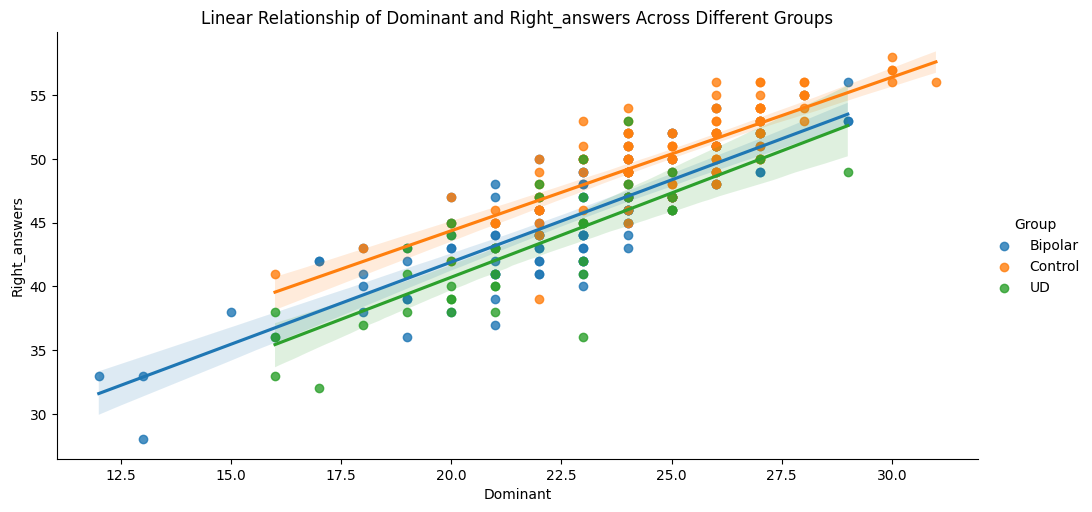

<Figure size 1200x600 with 0 Axes>

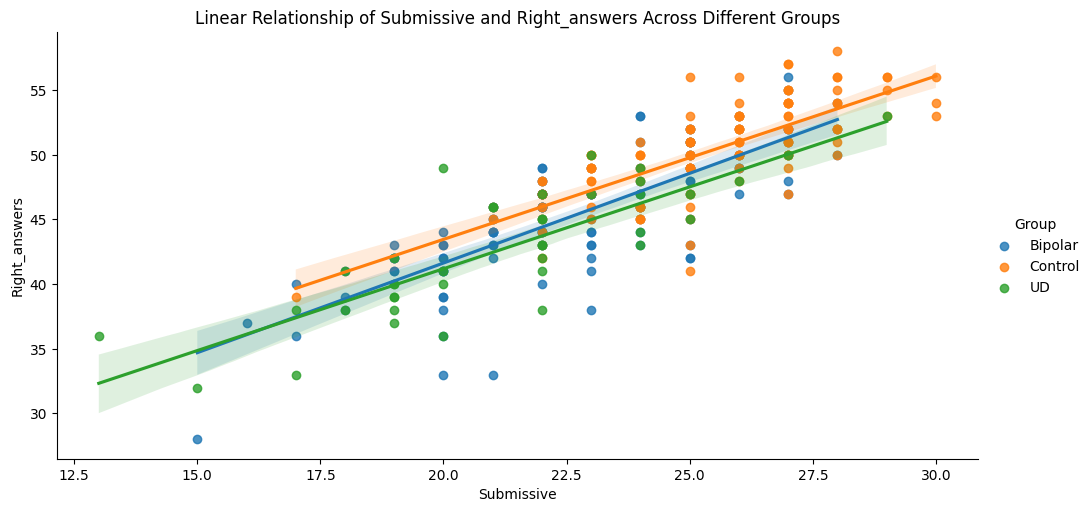

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# 'df' is your dataframe 
dependent_variable = 'Right_answers'
covariates = ['Age', 'Audio_prosody', 'Combined_channel', 'Face_video', 'Body_video', 'Positive_valence', 'Negative_valence', 'Dominant', 'Submissive']

for covariate in covariates:
    plt.figure(figsize=(12, 6))
    sns.lmplot(x=covariate, y=dependent_variable, hue='Group', data=df, aspect=2)
    plt.title(f'Linear Relationship of {covariate} and {dependent_variable} Across Different Groups')
    plt.show()


<Figure size 1200x600 with 0 Axes>

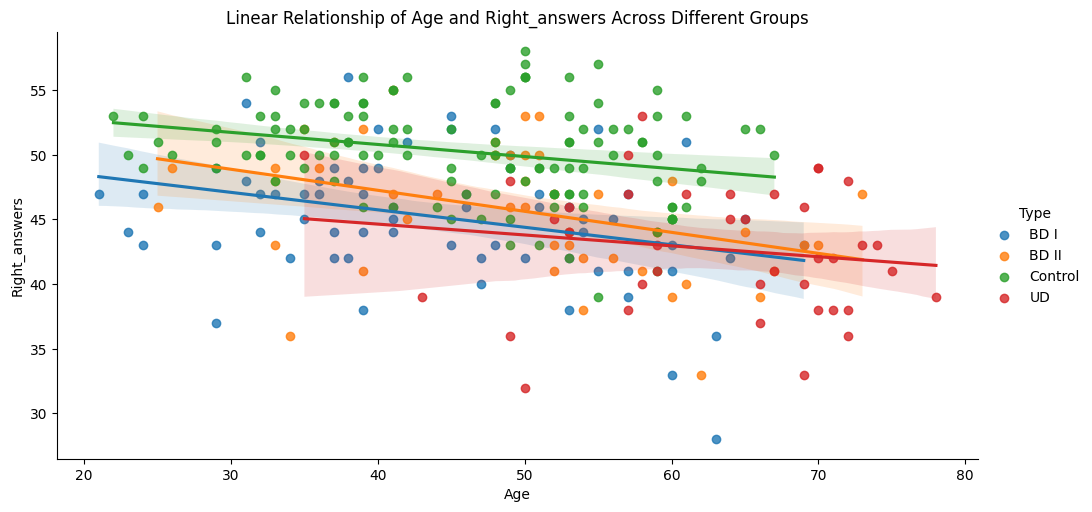

<Figure size 1200x600 with 0 Axes>

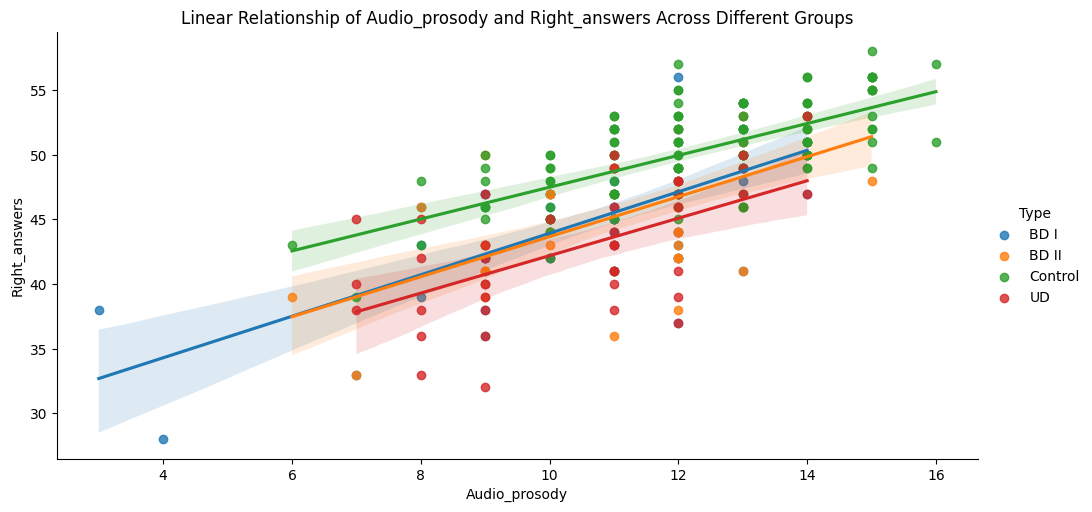

<Figure size 1200x600 with 0 Axes>

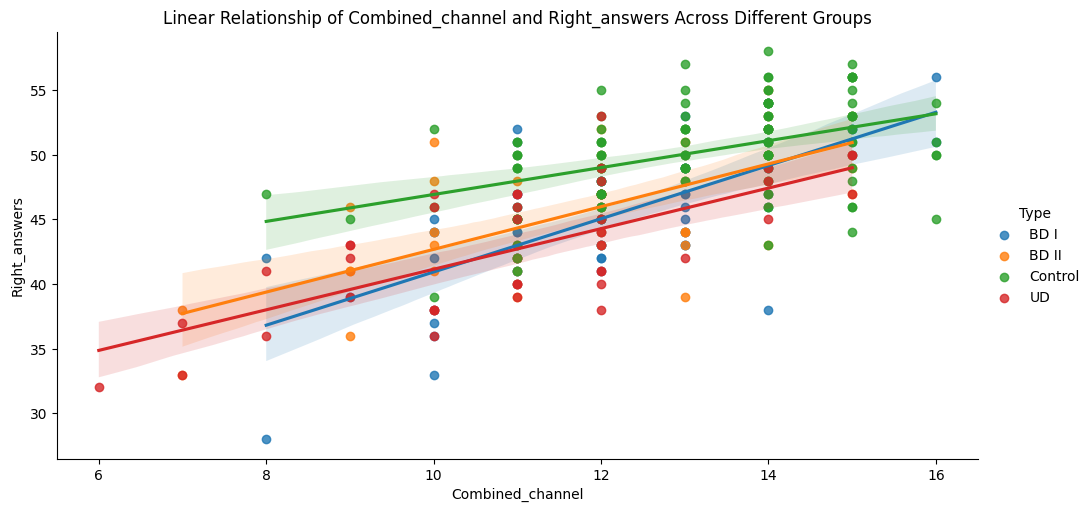

<Figure size 1200x600 with 0 Axes>

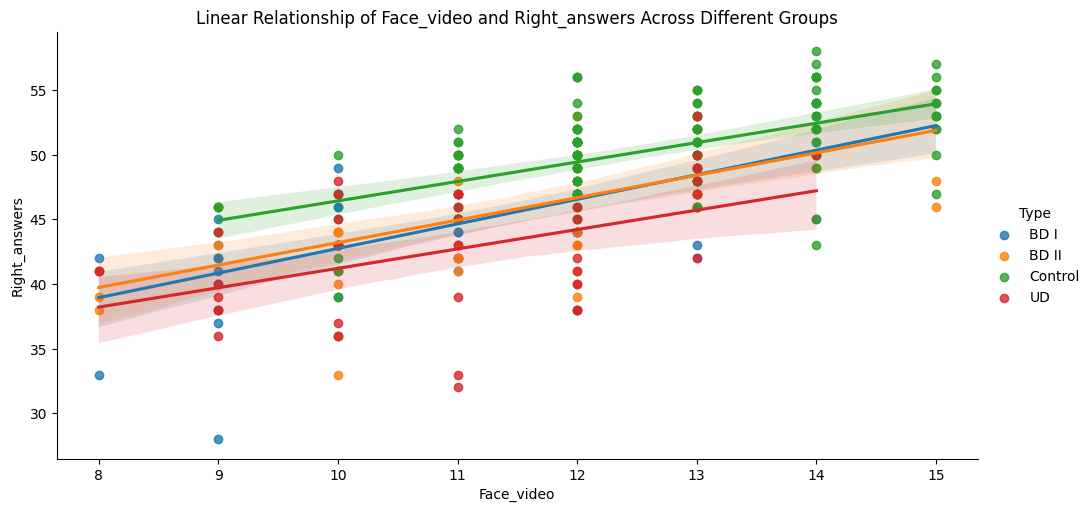

<Figure size 1200x600 with 0 Axes>

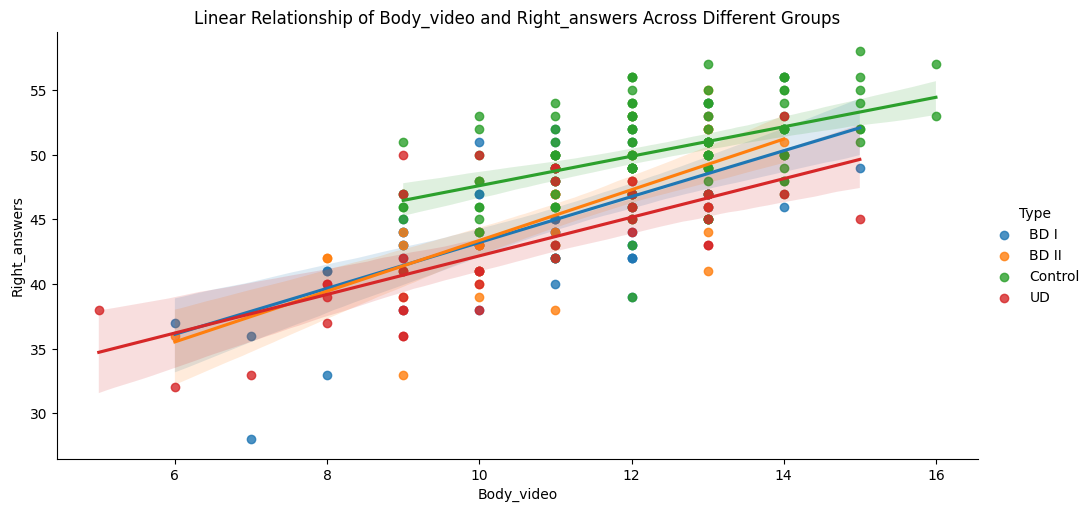

<Figure size 1200x600 with 0 Axes>

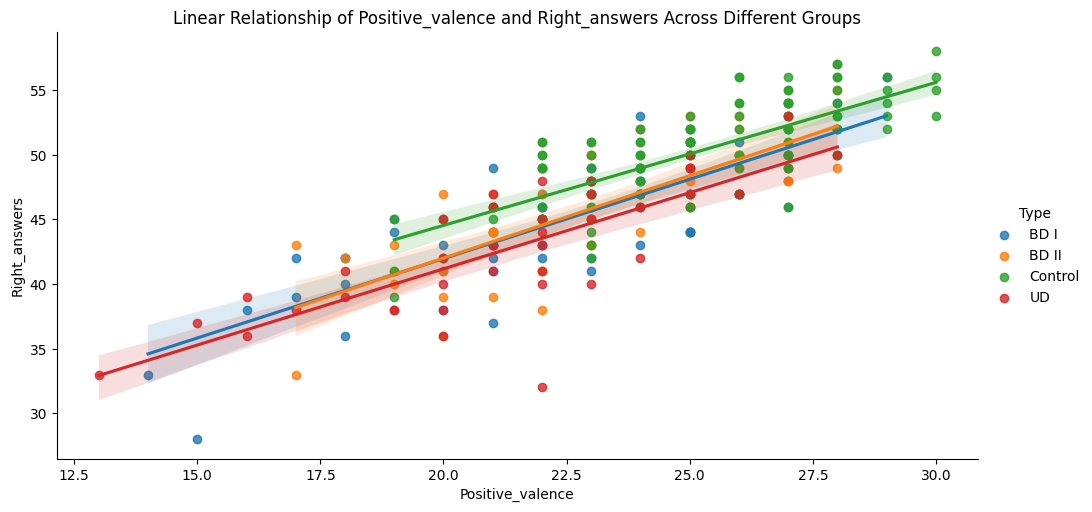

<Figure size 1200x600 with 0 Axes>

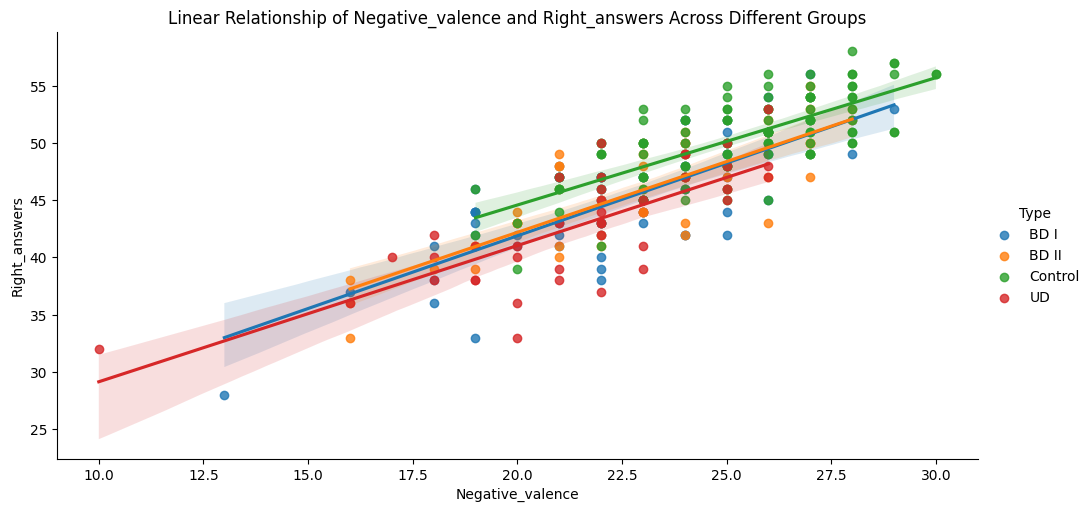

<Figure size 1200x600 with 0 Axes>

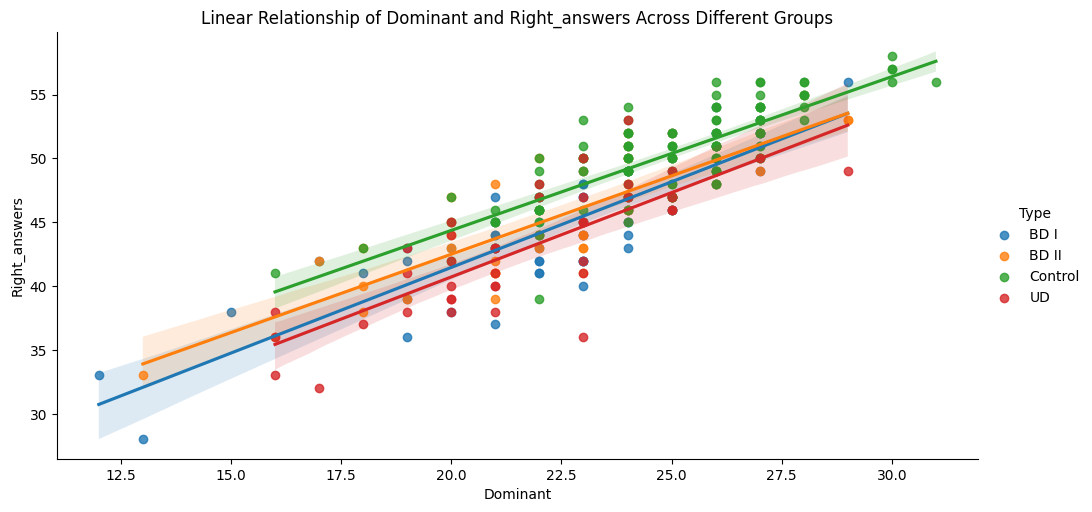

<Figure size 1200x600 with 0 Axes>

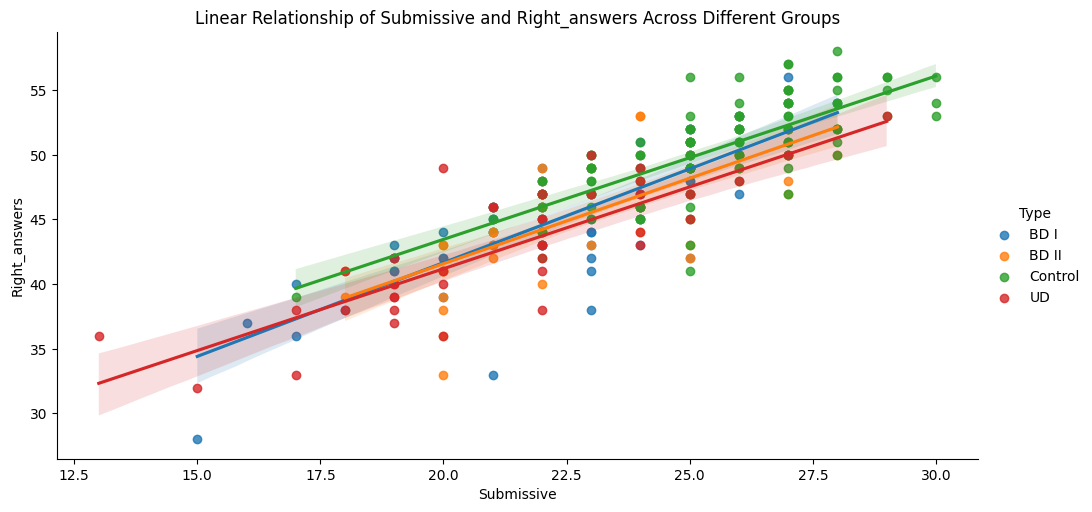

In [ ]:
# Second categorical variable 'Type' as hue.
dependent_variable = 'Right_answers'
covariates = ['Age', 'Audio_prosody', 'Combined_channel', 'Face_video', 'Body_video', 'Positive_valence', 'Negative_valence', 'Dominant', 'Submissive']
for covariate in covariates:
    plt.figure(figsize=(12, 6))
    sns.lmplot(x=covariate, y=dependent_variable, hue='Type', data=df, aspect=2)
    plt.title(f'Linear Relationship of {covariate} and {dependent_variable} Across Different Groups')
    plt.show()

The scatter plot with linear regression lines for each group shows the relationship between age (a continuous variable) and the number of right answers (another continuous variable), across different groups (categorical variable). This visualization is helpful in assessing if the within-group trends have the same slope and are parallel to one another, which is a critical assumption for conducting ANCOVA.

State the Null Hypotheses: In ANCOVA, the null hypotheses can be stated as:

H0A: The adjusted population group means for Factor A (main treatment effect) are all equal. This means the effect of each group equals zero.
H0B: The pooled population slope for Factor B (covariate effect) equals zero.
"Groups" in this context refer to the different categories of the categorical variable (e.g., different types of Bipolar disorder), and the "pooled population" refers to the entire dataset combining all these groups.
ANCOVA Design: Based on the dataset, a possible ANCOVA design would involve treating "Group" and "Type" as categorical factors and variables like "Age," "Right_answers," etc., as covariates. The linear model for ANCOVA would adjust the response variable (e.g., Right_answers) for the effects of these covariates.

Based on the dataset 
Response Variable: "Right_answers" seems to be a primary measure of performance and could serve as a good response variable. It is continuous, which is suitable for ANCOVA.
Covariates: We should choose covariates that are likely to have an impact on the response variable and are of interest in the study. Given the nature of the dataset, "Age" could be a relevant covariate as it might influence the performance measured by "Right_answers". Other potential covariates, if they are of interest, could include "Audio_prosody", "Combined_channel", "Face_video", "Body_video", "Positive_valence", "Negative_valence", "Dominant", and "Submissive".
Categorical Factors (for Factor A and B): The categorical variables in the dataset are "Group" and "Type". These can be considered as different factors in the ANCOVA analysis.
With this setup, the ANCOVA will help us understand how the response variable ("Right_answers") is influenced by the categorical factors ("Group" and "Type") after adjusting for the effects of the continuous covariate ("Age") and ("Dominant").
Including Dominant because it is highly influencing the dependent variable and since it is highly correlated with the other continuous variables it represents other covariants too.
The ANCOVA model can be written for the data as:

yij = μ + a1Groupi+ a2Typei + β1 (xij−xˉ) +β2 (dij− dˉ)+ ϵij


1.	yij represents the response variable for the ith level of the categorical variable and the jth observation. In the context of this dataset, yij would be 'Right_answers'.
2.	μ is the overall mean of the response variable, which is the mean of 'Right_answers' across all observations.
3.	a1 & a2is the effect of the ith level of the categorical variable. This would correspond to the effect of 'Group' and 'Type' in the dataset. It's represented by the coefficients of the categorical variables in the model.
4. β1 and β2 are the regression coefficients for the covariates 'Age' and 'Dominant', respectively.
5. xij is the value of the covariate 'Age' for the ith level and jth observation.
6. dij is the value of the covariate 'Dominant' for the ith level and jth observation.
7.xˉ and dˉ are the mean values of the covariates 'Age' and 'Dominant', respectively.
8. ϵij is the random error term for each observation, which is the residuals of the model.

Adjustment Formula:
yij(adj) = yij− β1(xij− xˉ)-β2 (dij-dˉ)

This formula adjusts the response variable for the covariate effects, allowing for a clearer understanding of the categorical group effects without the influence of 'Age' and 'Dominant'.

Let's proceed with this configuration:

Perform ANCOVA with "Right_answers" as the response variable.
Use "Age" and "Dominant" as the covariate.
Consider "Group" and "Type" as categorical factors.

Null Hypotheses (H0):
H0 for Group: There is no significant difference in the mean 'Right_answers' scores between the different groups ('Bipolar', etc.) after controlling for the effect of age & Dominant.
H0 for Type: There is no significant difference in the mean 'Right_answers' scores between the different types (e.g., 'BD I', 'BD II') after controlling for the effect of age & Dominant.

Alternative Hypotheses (H1):
H1 for Group: There is a significant difference in the mean 'Right_answers' scores between the different groups after controlling for the effect of age & Dominant.
H1 for Type: There is a significant difference in the mean 'Right_answers' scores between the different types after controlling for the effect of age & Dominant.
These hypotheses aim to test whether the mean scores on 'Right_answers' differ significantly across the groups and types, while controlling for any potential effect that age might have on these scores. Let's proceed with the ANCOVA analysis based on these hypotheses.

We will also check the assumptions required for ANCOVA, including the normality of residuals, homogeneity of variance, independence of residuals, and linearity between the response variable and covariates. Let's start with the ANCOVA analysis.

In [7]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats

# Performing ANCOVA with 'Right_answers' as the response variable, 'Age' as the covariate,
# and 'Group' and 'Type' as categorical factors.
ancova_model = ols('Right_answers ~ C(Group) + C(Type) + Age + Dominant', data=df).fit()

# Summary of the model
ancova_model_summary = ancova_model.summary()
print(ancova_model_summary)

# ANCOVA table
ancova_table = sm.stats.anova_lm(ancova_model, typ=2)


# Displaying the ANCOVA table 
ancova_table



                            OLS Regression Results                            
Dep. Variable:          Right_answers   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     202.5
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           2.57e-89
Time:                        18:03:37   Log-Likelihood:                -635.52
No. Observations:                 277   AIC:                             1283.
Df Residuals:                     271   BIC:                             1305.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              19.4359    

,sum_sq,df,F,PR(>F)
C(Group),316.691742,2.0,26.901954,2.201204e-11
C(Type),318.169882,3.0,18.018345,1.083952e-10
Age,77.140603,1.0,13.105696,3.512528e-04
Dominant,3218.852539,1.0,546.862520,5.899680e-67
Residual,1595.115787,271.0,NaN,NaN


The ANCOVA results can be interpreted as follows:

The results of your improved ANCOVA model can be interpreted as follows:

C(Group):
Sum of Squares (316.69): This value represents the total variability in the response variable ('Right_answers') attributed to the differences between the groups.
Degrees of Freedom (df = 2): This indicates the number of levels in the 'Group' variable minus one.
F-Statistic (26.90): Indicates the statistical significance of the 'Group' factor. A higher value suggests a stronger effect.
P-Value (2.20e-11): Extremely low, indicating that the differences in 'Right_answers' across different groups are statistically significant.

C(Type):
Sum of Squares (318.17): Represents variability in 'Right_answers' due to different 'Type'.
Degrees of Freedom (df = 3): Reflects the number of levels in the 'Type' variable minus one.
F-Statistic (18.02): Demonstrates the significance of the 'Type' factor.
P-Value (1.08e-10): Very low, suggesting significant differences in 'Right_answers' across different types.

Age:
Sum of Squares (77.14): Indicates the amount of variability in 'Right_answers' explained by 'Age'.
Degrees of Freedom (df = 1): As 'Age' is a single covariate.
F-Statistic (13.11): Shows the influence of 'Age' on 'Right_answers'.
P-Value (3.51e-04): Signifies that 'Age' has a statistically significant effect on 'Right_answers'.

Dominant:
Sum of Squares (3218.85): Reflects the variation in 'Right_answers' due to 'Dominant'.
Degrees of Freedom (df = 1): For the 'Dominant' covariate.
F-Statistic (546.86): Very high value, indicating a strong effect of 'Dominant' on 'Right_answers'.
P-Value (5.90e-67): Extremely low, confirming the significant impact of 'Dominant'.

Residual:
Sum of Squares (1595.12): Represents the unexplained variability in 'Right_answers' after accounting for the effects of all included factors and covariates.

Degrees of Freedom (df = 271): Calculated as the total number of observations minus the total number of groups and types, minus one for each covariate.

Overall Interpretation:
The significant p-values for both 'Group' and 'Type' suggest these factors have a substantial impact on the number of right answers. It implies that the differences observed are not just due to random variation.
The 'Age' and 'Dominant' covariates significantly influence the response variable, as indicated by their respective p-values. The inclusion of 'Dominant' as a covariate notably adds explanatory power to the model, evident from its high F-statistic.
The relatively large sum of squares for 'Dominant' compared to other variables indicates its strong influence on the variation in 'Right_answers'.
The residual sum of squares and its degrees of freedom help in understanding the variability not explained by the model.
This model, with its significant covariates and factors, provides a robust explanation of the factors influencing 'Right_answers'. However, it's essential to ensure that the model assumptions are met and to be cautious about over-interpreting the results, especially in complex models with multiple predictors.

Description of Factors and Covariates:

Factor A ("Group"): A categorical factor representing different groups in the dataset, specifically related to types of Bipolar disorder (e.g., Bipolar, Control).
Factor B ("Type"): Another categorical factor distinguishing between subtypes within the groups (e.g., BD I, BD II).
Covariate ("Age"): A continuous variable used to control for its effect on the response variable.
Covariate ("Dominant"): Additionally included as a continuous variable to account for its potential influence on the response variable.

Calculations:
Total Variability of the Response Variable ("Right_answers"): Represented by the total sum of squares in the ANCOVA table. It encompasses both the explained and unexplained variability in 'Right_answers'.
Unexplained Residuals and F-ratios for Each Factor:
The unexplained residuals (variability not explained by the factors or covariates) are indicated by the "Residual" sum of squares in the ANCOVA table.
The F-ratios for 'Group', 'Type', 'Age', and 'Dominant' are calculated as the mean square of each factor or covariate divided by the mean square of the residuals.
Covariate Levels:
"Age" and "Dominant" are continuous variables, so they don't have discrete levels but rather a range of values.

In [8]:
# Calculating the total variability of the response variable (Total Sum of Squares)
total_variability = ancova_model.mse_total * len(df)

# Unexplained residuals (Residual Sum of Squares)
unexplained_residuals = ancova_table.loc['Residual', 'sum_sq']

# F-ratios for each factor and covariate
f_ratio_group = ancova_table.loc['C(Group)', 'F']
f_ratio_type = ancova_table.loc['C(Type)', 'F']
f_ratio_age = ancova_table.loc['Age', 'F']
f_ratio_dominant = ancova_table.loc['Dominant', 'F']

# Range of the covariates "Age" and "Dominant"
age_range = df['Age'].min(), df['Age'].max()
dominant_range = df['Dominant'].min(), df['Dominant'].max()

# Displaying the calculated values
total_variability, unexplained_residuals, (f_ratio_group, f_ratio_type, f_ratio_age, f_ratio_dominant), age_range, dominant_range


(7581.623188405796,
 1595.1157865732089,
 (26.901953690961193,
  18.018344649269082,
  13.10569645756114,
  546.8625196173435),
 (21, 78),
 (12, 31))

Here are the results from the ANCOVA analysis based on the dataset:

Total Variability of the Response Variable:
The total variability in "Right_answers" (Total Sum of Squares) is approximately 7581.62. This represents the overall variation in the response variable, encompassing both the explained and unexplained parts.
Unexplained Residuals:
The unexplained residuals (Residual Sum of Squares) amount to approximately 1595.11 This figure represents the portion of variability in "Right_answers" that is not explained by the categorical factors ("Group" and "Type") or the covariates ("Age") & ("Dominant").
F-ratios for Each Factor:
The F-ratio for the "Group" factor is approximately 26.90, indicating a significant effect of this factor on the response variable.
The F-ratio for the "Type" factor is approximately 18.01, also indicating a significant effect.
The F-ratio for the covariate "Age" is approximately 13.10, signifying its significant impact on the response variable.
The F-ratio for the covariate "Dominant" is approximately 546.86, signifying its significant impact on the response variable.
Covariate Levels (Age Range):
The covariate in this analysis, "Age," has a range from 21 to 78. This range represents the different levels at which the covariate was observed in the dataset.
The covariate in this analysis, "Dominant," has a range from 12 to 31. This range represents the different levels at which the covariate was observed in the dataset.
These results provide insights into how the factors "Group" and "Type" and the covariate "Age" & "Dominant" influences the response variable "Right_answers". The significant F-ratios for each factor suggest that they have a notable impact on the number of right answers, while the substantial unexplained residuals indicate variability in the response that is not accounted for by these factors and the covariate. 

## Verifying assumptions ##

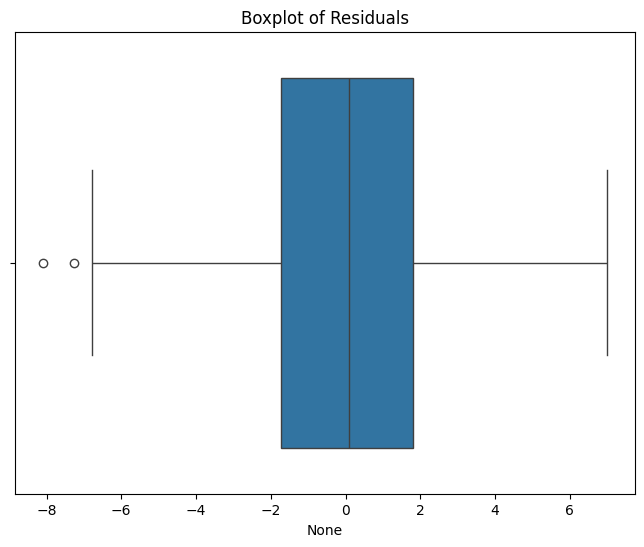

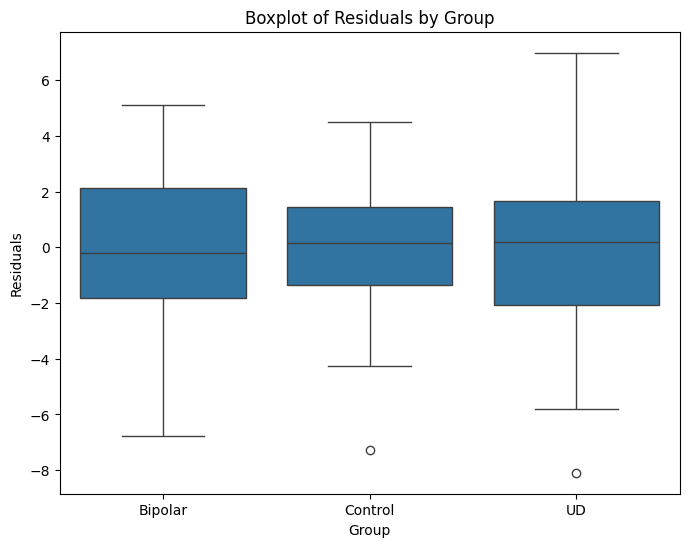

Durbin-Watson statistic: 1.9842021969318526


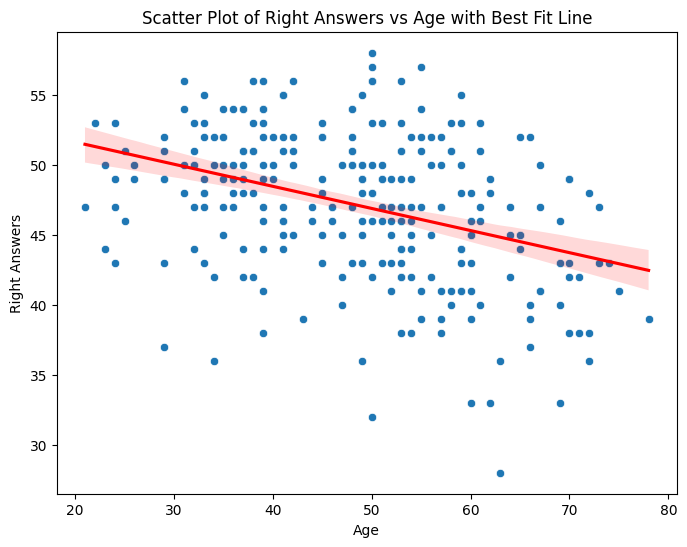

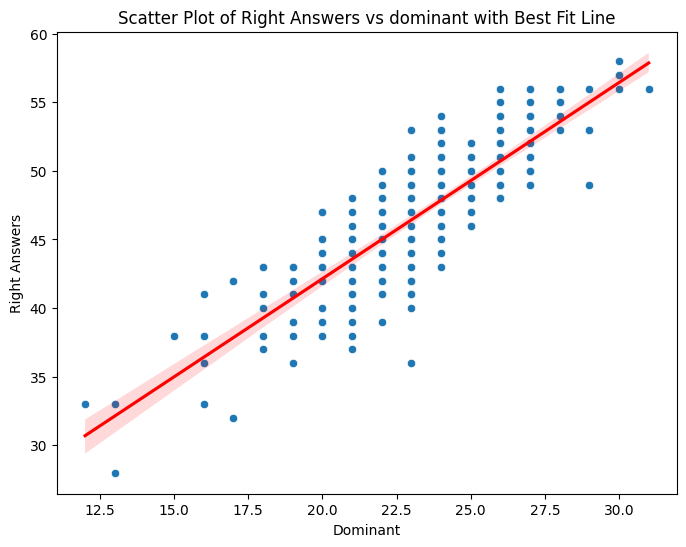

In [9]:
# Checking ANCOVA assumptions with the suggested methods

# 1. Checking if residuals are normally distributed using a boxplot
residuals = ancova_model.resid
plt.figure(figsize=(8, 6))
sns.boxplot(x=residuals)
plt.title("Boxplot of Residuals")
plt.show()

# 2. Checking if residuals are equally varied (homoscedasticity) using a boxplot against a categorical variable
# For this, let's use the 'Group' variable
plt.figure(figsize=(8, 6))
sns.boxplot(x='Group', y=residuals, data=df)
plt.title("Boxplot of Residuals by Group")
plt.xlabel("Group")
plt.ylabel("Residuals")
plt.show()

#3.Check for Independence of Residuals:
#The Durbin-Watson statistic can be used. A value close to 2 suggests independence.
from statsmodels.stats.stattools import durbin_watson
dw = durbin_watson(residuals)
print("Durbin-Watson statistic:", dw)


# 4. Checking for linearity: visually inspecting the relation between response and covariate again
# Creating a scatter plot of 'Right_answers' versus 'Age' with a best fit line
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Right_answers', data=df)
sns.regplot(x='Age', y='Right_answers', data=df, scatter=False, color='red')  # Adding a best fit line
plt.title('Scatter Plot of Right Answers vs Age with Best Fit Line')
plt.xlabel('Age')
plt.ylabel('Right Answers')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Dominant', y='Right_answers', data=df)
sns.regplot(x='Dominant', y='Right_answers', data=df, scatter=False, color='red')  # Adding a best fit line
plt.title('Scatter Plot of Right Answers vs dominant with Best Fit Line')
plt.xlabel('Dominant')
plt.ylabel('Right Answers')
plt.show()

# 5 & 6. Sphericity and block interactions are not applicable here as the study design does not involve repeated measures or blocking.

The plots for verifying the assumptions of the ANCOVA analysis are as follows:

1.Normal Distribution of Residuals:
The boxplot of the residuals shows the distribution of these values. The presence of outliers is indicated by points beyond the whiskers. The median is close to zero, and the distribution appears symmetrical, suggesting that the residuals are approximately normally distributed. However, the presence of outliers might warrant further investigation.

2.Homoscedasticity (Equal Variance of Residuals):
The boxplot of residuals by the "Group" category provides a visual assessment of the variance across different groups. Ideally, the spread (height of boxes and whiskers) in each group should be similar. The plot shows some variability in spread across groups, indicating potential differences in variance. This suggests that the assumption of homoscedasticity might be somewhat violated.

3.Independence of Residuals:
Durbin-Watson Statistic (1.984): This value is very close to 2, suggesting there is no significant autocorrelation in the residuals. This is a good sign and implies that the residuals are independent, an important assumption in regression analysis.

4.Linearity between Response Variable and Covariates:
The scatter plot of "Right Answers" versus "Age" & "Dominant" indicates a linear relationship between these variables. The plot does not show any obvious deviations from linearity, suggesting that this assumption is met.

5.Sphericity and Block Interactions:
Sphericity and block interactions are assumptions relevant in specific types of designs like repeated measures ANOVA or block designs. Since this dataset does not appear to be based on such designs, these checks are not applicable.

Based on these visual assessments, while there is some concern regarding the homoscedasticity and the presence of outliers in the residuals, other assumptions seem to be reasonably met. Adjustments or alternative analysis methods might be considered if these potential issues are significant. ​​

After verifying the assumptions of your ANCOVA model (normality of residuals, homoscedasticity, independence of residuals, and linearity), the next step is to use the model to make predictions. This involves using the model to estimate the response variable ('Right_answers') for new observations. The nature of these predictions, their computational basis, and the confidence we can have in their accuracy depend on several factors:

Nature of Predictions: Predictions will provide estimated values of 'Right_answers' based on the covariates ('Age', 'Dominant') and the categories ('Group', 'Type'). For instance, we might predict how many right answers we would expect for a given age and dominant score within a specific group and type.
Computational Explanation: To make predictions, we typically use the predict method of the model, passing in new data that include values for the covariates and categorical variables. The model then uses the coefficients it has learned to compute the expected value of 'Right_answers'.
Graphical Representation: We can visualize these predictions by creating a plot that shows the predicted values of 'Right_answers' against one of the covariates, with separate lines for different groups or types. This helps in understanding how the response variable changes with the covariate within each group or type.
Confidence in Predictions: The accuracy of the predictions depends on how well the model fits the data (as indicated by R-squared, residuals analysis, etc.), how well the assumptions are met, and the range of the covariate values. Predictions are more reliable within the range of data the model was trained on and become less reliable when extrapolating beyond that range.

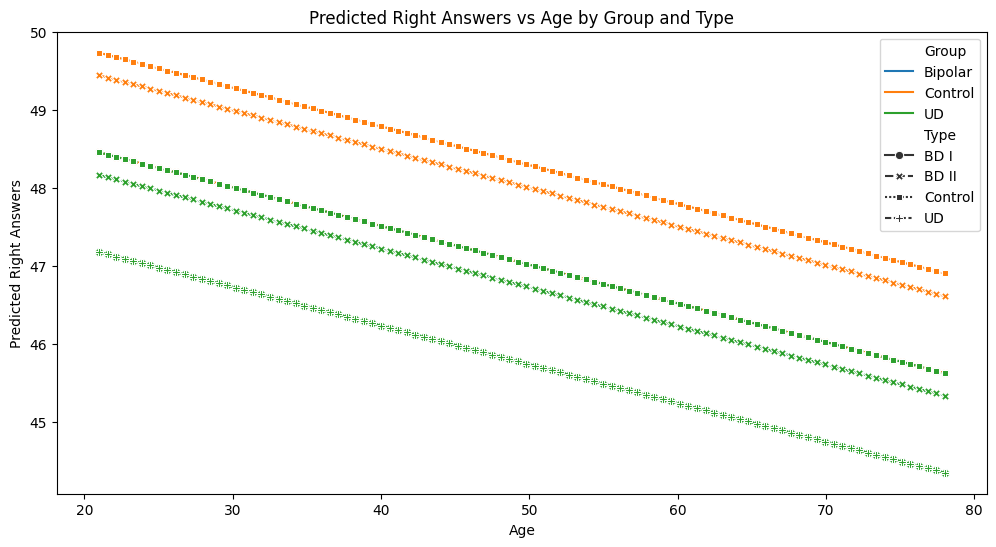

In [10]:
import itertools

# Create a new DataFrame for prediction that covers a broader range of 'Age' and includes all 'Group' and 'Type' combinations
age_range = np.linspace(df['Age'].min(), df['Age'].max(), 100)  # Adjust 100 to the desired number of points
dominant_range = np.linspace(df['Age'].min(), df['Age'].max(), 100)  # Adjust 100 to the desired number of points
group_categories = df['Group'].unique()
type_categories = df['Type'].unique()

# Create all combinations for 'Group', 'Type', and a range of 'Age'
new_data = pd.DataFrame(list(itertools.product(group_categories, type_categories, age_range, dominant_range)), columns=['Group', 'Type', 'Age','Dominant'])
new_data['Dominant'] = df['Dominant'].mean()  # Set a constant 'Dominant' score for simplicity

# Making predictions
new_data['Predicted_Right_Answers'] = ancova_model.predict(new_data)

# Plotting the predictions
plt.figure(figsize=(12, 6))
sns.lineplot(x='Age', y='Predicted_Right_Answers', hue='Group', style='Type', data=new_data, markers=True)
plt.title("Predicted Right Answers vs Age by Group and Type")
plt.xlabel('Age')
plt.ylabel('Predicted Right Answers')
plt.show()



The graph shows the predicted 'Right_answers' as a function of 'Age' for different groups and types. The lines represent the relationship between age and the number of right answers, with each line corresponding to a combination of 'Group' and 'Type'. Here's how we can interpret the results:

Trend: The lines show a downward trend, indicating that as age increases, the predicted number of right answers decreases.
Group Differences: There are separate lines for different 'Group' categories (e.g., Bipolar, Control), which suggests that these groups have different intercepts in the model – meaning, for a given age, the starting number of right answers is different across groups.

Type Differences: Within each group, lines with different styles represent different 'Type' categories (e.g., BD I, BD II, Control). Variations in these lines imply that the subtypes also influence the number of right answers.

Confidence in Results: Assuming that the model's assumptions are met (which based on your previous messages, include checks for normality, homoscedasticity, and independence), and the model has a good fit (which seems to be indicated by an R-squared of 0.789), we can be reasonably confident in the accuracy of these predictions within the age range shown.

Graphical Interpretation: The markers on the lines likely represent the actual data points used to generate the predictions. If they're evenly distributed along the lines, this indicates that the model's predictions are consistent across the age range.
Potential Extrapolation: If the age range in the prediction data extends beyond the range of ages in the training data, be cautious in interpreting those predictions, as they may be extrapolations.

In summary, the plot visually communicates how 'Right_answers' are expected to change with 'Age' across different 'Groups' and 'Types'. It can be used to make informed predictions about the performance on the basis of these factors. However, if 'Dominant' is also a significant predictor, we might consider including it in the plot for a more comprehensive analysis.

## Including Dominant variable & using 3D Plot to visualize the Predicted Right Answers vs Age and Dominant by Group and Type ##

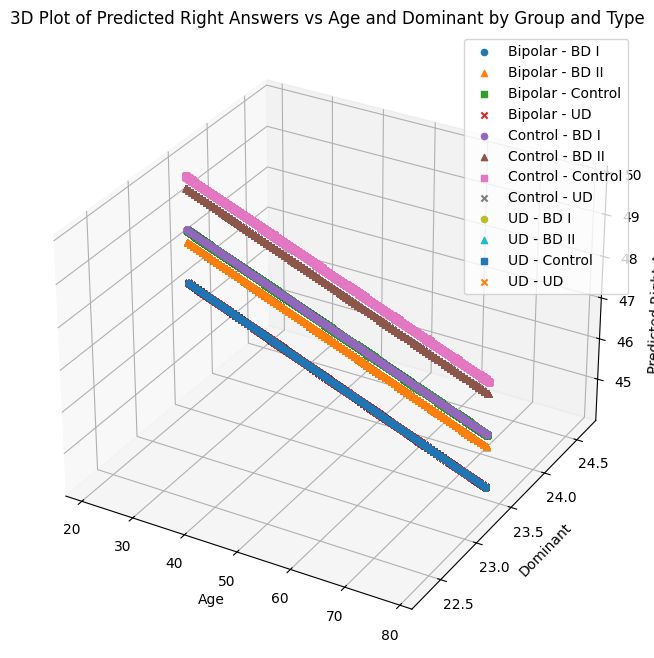

In [11]:
from mpl_toolkits.mplot3d import Axes3D

# 'ancova_model' is the fitted model and 'df' is your original DataFrame
# created 'new_data' DataFrame with the 'Age', 'Group', 'Type', and 'Dominant' before

# Making predictions on your new_data DataFrame
new_data['Predicted_Right_Answers'] = ancova_model.predict(new_data)

# Plotting the predictions in 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for predictions
# You can color by 'Group' and use different markers for 'Type'
# Here's an example of how you might set different markers:
markers = {'BD I': 'o', 'BD II': '^', 'Control': 's', 'UD': 'x'}
for group in group_categories:
    for type_ in type_categories:
        subset = new_data[(new_data['Group'] == group) & (new_data['Type'] == type_)]
        ax.scatter(subset['Age'], subset['Dominant'], subset['Predicted_Right_Answers'], 
                   label=f'{group} - {type_}', marker=markers[type_])

ax.set_xlabel('Age')
ax.set_ylabel('Dominant')
ax.set_zlabel('Predicted Right Answers')
ax.set_title('3D Plot of Predicted Right Answers vs Age and Dominant by Group and Type')
ax.legend()
plt.show()


# Analysis of Covariance (ANCOVA) on MiniPONS Dataset #

Abstract:

This report presents an Analysis of Covariance (ANCOVA) on the MiniPONS dataset, which aims to explore the effects of various covariates on the dependent variable, 'Right_answers', a measure indicative of cognitive performance. The ANCOVA model integrates both categorical and continuous variables, offering insight into the main and interaction effects while controlling for potential confounders.

1. Introduction:

The MiniPONS dataset is a valuable resource in the realm of psychological studies, specifically in the context of remitted bipolar disorder. This report utilizes ANCOVA to investigate how factors such as age and dominant behavior, along with categorical groupings, impact the correct responses in a given psychological assessment.

2. Methodology:

The dataset comprises 277 entries spanning various psychological measures. The ANCOVA model was selected for its capacity to handle mixed categorical and continuous variables, offering a nuanced understanding of their influence on the dependent variable. The analysis was conducted using Python, with libraries such as Pandas for data management ,numpy for calculations, and Statsmodels for statistical modeling.

3. Data Analysis:

Data preprocessing involved confirming the absence of missing values and summarizing the dataset's characteristics. A correlation matrix was constructed to discern preliminary associations between the variables, guiding the subsequent ANCOVA model formulation.

4. Results:

The ANCOVA analysis revealed significant effects of both age and dominant behavior on 'Right_answers', as well as notable differences across the categorical variables of 'Group' and 'Type'. Visualizations, including heatmaps and scatter plots, corroborated these findings, demonstrating clear trends and interactions within the data.

5. Discussion:

Findings suggest that demographic and behavioral factors significantly modulate cognitive performance within the dataset's population. The assumption checks for ANCOVA, including linearity, independence of residuals and normality of residuals, supported the model's validity, although a potential concern regarding multicollinearity was noted also the assumption of homoscedasticity was some what voilated, necessitating further scrutiny.

6. Conclusions:

The study underscores the importance of considering a multiplicity of factors when assessing cognitive performance, particularly in diverse populations. The insights gained from the ANCOVA model have implications for both clinical practice and future research, especially in refining diagnostic tools and therapeutic approaches for bipolar disorder.


References:

Kaggle. (2019). Theory of mind in remitted bipolar disorder  [Data set]. https://www.kaggle.com/datasets/mercheovejero/theory-of-mind-in-remitted-bipolar-disorder